In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from wordcloud import WordCloud

%matplotlib inline

In [2]:
df = pd.read_csv('twitter.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.tail()

id        date      time                    timezone  \
179345  17865612179  2010-07-06  15:02:30  South Africa Standard Time   
179346  17863376524  2010-07-06  14:22:06  South Africa Standard Time   
179347  17861902512  2010-07-06  13:53:02  South Africa Standard Time   
179348  17860287456  2010-07-06  13:17:40  South Africa Standard Time   
179349  16925503262  2010-06-24  14:30:21  South Africa Standard Time   

          user_id         username  \
179345  159074771  CapeTownFreeway   
179346  159074771  CapeTownFreeway   
179347  159074771  CapeTownFreeway   
179348  159074771  CapeTownFreeway   
179349  159074771  CapeTownFreeway   

                                                    tweet  replies  retweets  \
179345  Stationary vehicle on N1 is cleared, Elevated ...        0         0   
179346  Stationary vehicle on N1 Inbound, after Durban...        0         0   
179347  Elevated Freeway slow moving, rest of freeway ...        0         0   
179348  Congestion on Elevated Freeway. Rest of Freewa...        0         0   
179349                                       Test Message        0         0   

        likes  location hashtags  \
179345      0       NaN      NaN   
179346      0       NaN      NaN   
179347      0       NaN      NaN   
179348      0       NaN      NaN   
179349      0       NaN      NaN   

                                                     link  retweet user_rt  \
179345  https://twitter.com/CapeTownFreeway/status/178...      NaN    None   
179346  https://twitter.com/CapeTownFreeway/status/178...      NaN    None   
179347  https://twitter.com/CapeTownFreeway/status/178...      NaN    None   
179348  https://twitter.com/CapeTownFreeway/status/178...      NaN    None   
179349  https://twitter.com/CapeTownFreeway/status/169...      NaN    None   

       mentions  
179345      NaN  
179346      NaN  
179347      NaN  
179348      NaN  
179349      NaN

In [4]:
df.head()

id        date      time                    timezone  \
0  1021390034908401664  2018-07-23  15:42:15  South Africa Standard Time   
1  1021389712370651142  2018-07-23  15:40:58  South Africa Standard Time   
2  1021389029097525248  2018-07-23  15:38:15  South Africa Standard Time   
3  1021387092419588098  2018-07-23  15:30:33  South Africa Standard Time   
4  1021380404618702849  2018-07-23  15:03:59  South Africa Standard Time   

     user_id         username  \
0  159074771  CapeTownFreeway   
1  159074771  CapeTownFreeway   
2  159074771  CapeTownFreeway   
3  159074771  CapeTownFreeway   
4  159074771  CapeTownFreeway   

                                               tweet  replies  retweets  \
0  Slow moving Traffic: N1 Outbound towards Koebe...        0         1   
1  Slow moving Traffic: N2 Outbound towards Hospi...        0         0   
2  Update :Stationary on N2  Outbound Ramp to Air...        0         0   
3  134419:Stationary on N2  Outbound Ramp to Airp...        0         0   
4  Lost Load: N2 Outbound @ Bhunga, all lanes ope...        0         0   

   likes  location         hashtags  \
0      1       NaN  #BoozeFreeRoads   
1      0       NaN  #BoozeFreeRoads   
2      0       NaN  #BoozeFreeRoads   
3      0       NaN  #BoozeFreeRoads   
4      0       NaN  #BoozeFreeRoads   

                                                link  retweet user_rt mentions  
0  https://twitter.com/CapeTownFreeway/status/102...      NaN    None      NaN  
1  https://twitter.com/CapeTownFreeway/status/102...      NaN    None      NaN  
2  https://twitter.com/CapeTownFreeway/status/102...      NaN    None      NaN  
3  https://twitter.com/CapeTownFreeway/status/102...      NaN    None      NaN  
4  https://twitter.com/CapeTownFreeway/status/102...      NaN    None      NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179350 entries, 0 to 179349
Data columns (total 16 columns):
id          179350 non-null int64
date        179350 non-null object
time        179350 non-null object
timezone    179350 non-null object
user_id     179350 non-null int64
username    179350 non-null object
tweet       179350 non-null object
replies     179350 non-null int64
retweets    179350 non-null int64
likes       179350 non-null int64
location    0 non-null float64
hashtags    71172 non-null object
link        179350 non-null object
retweet     0 non-null float64
user_rt     179350 non-null object
mentions    188 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 21.9+ MB


## A few simple checks on the data concluding with a wordcloud of the hashtags

In [6]:
df.head()

id        date      time                    timezone  \
0  1021390034908401664  2018-07-23  15:42:15  South Africa Standard Time   
1  1021389712370651142  2018-07-23  15:40:58  South Africa Standard Time   
2  1021389029097525248  2018-07-23  15:38:15  South Africa Standard Time   
3  1021387092419588098  2018-07-23  15:30:33  South Africa Standard Time   
4  1021380404618702849  2018-07-23  15:03:59  South Africa Standard Time   

     user_id         username  \
0  159074771  CapeTownFreeway   
1  159074771  CapeTownFreeway   
2  159074771  CapeTownFreeway   
3  159074771  CapeTownFreeway   
4  159074771  CapeTownFreeway   

                                               tweet  replies  retweets  \
0  Slow moving Traffic: N1 Outbound towards Koebe...        0         1   
1  Slow moving Traffic: N2 Outbound towards Hospi...        0         0   
2  Update :Stationary on N2  Outbound Ramp to Air...        0         0   
3  134419:Stationary on N2  Outbound Ramp to Airp...        0         0   
4  Lost Load: N2 Outbound @ Bhunga, all lanes ope...        0         0   

   likes  location         hashtags  \
0      1       NaN  #BoozeFreeRoads   
1      0       NaN  #BoozeFreeRoads   
2      0       NaN  #BoozeFreeRoads   
3      0       NaN  #BoozeFreeRoads   
4      0       NaN  #BoozeFreeRoads   

                                                link  retweet user_rt mentions  
0  https://twitter.com/CapeTownFreeway/status/102...      NaN    None      NaN  
1  https://twitter.com/CapeTownFreeway/status/102...      NaN    None      NaN  
2  https://twitter.com/CapeTownFreeway/status/102...      NaN    None      NaN  
3  https://twitter.com/CapeTownFreeway/status/102...      NaN    None      NaN  
4  https://twitter.com/CapeTownFreeway/status/102...      NaN    None      NaN

In [7]:
df['mentions'].unique()

array([nan, 'potsdam', 'liesbeeck', 'CTCycleTour', 'R300', 'RamP', 'mew',
       'borcherd', 'savewater', 'durban', '26', 'CapeTownFreeway',
       'thecounter', 'Heart1049FM,KFMza,GoodHopeFM,CapeRugbyTV',
       'EWNTraffic', 'shwood', 'liferetreat_', 'old', 'bdunlop2015', 'be',
       'CTSeth,stanleygabriel', '20yearsfreedom', 'Swannie1',
       'SportUpdateSA', 'Tourism_Update', 'encanews,flysaa,Vodacom,MTNza',
       'Tammyandluis', 'frankortmann', 'FrancoisCTown', 'Nodds31',
       'BecauseBeige', 'JAHartogh', 'DayneEliza', 'Kellie6508',
       'SinnaRoo', 'JaxTheMinx', 'NeilYorke', 'knowcapetown', 'Asandak',
       'cheryleah', 'nixgrim', 'nimming', 'Smart4x4Chick', 'Ruth_L',
       'DistinctiveB', 'nigelisaacs14', 'JoyENorman', 'cpttraffic',
       'Liannelippert', 'AARTAPPEL83', 'vangaurd', 'accident',
       'AccidentAlerts', 'Delays', 'Stan1469', 'NoerGamad', 'TheSmitzer',
       'CandiceGMC', 'village99', 'standerdaan', 'FreakZAR', 'hjlinde',
       'FromageDeFrance', 'Jehan

In [8]:
df['date_time'] = df['date'] + ' ' + df['time']

In [9]:
df.head()

id        date      time                    timezone  \
0  1021390034908401664  2018-07-23  15:42:15  South Africa Standard Time   
1  1021389712370651142  2018-07-23  15:40:58  South Africa Standard Time   
2  1021389029097525248  2018-07-23  15:38:15  South Africa Standard Time   
3  1021387092419588098  2018-07-23  15:30:33  South Africa Standard Time   
4  1021380404618702849  2018-07-23  15:03:59  South Africa Standard Time   

     user_id         username  \
0  159074771  CapeTownFreeway   
1  159074771  CapeTownFreeway   
2  159074771  CapeTownFreeway   
3  159074771  CapeTownFreeway   
4  159074771  CapeTownFreeway   

                                               tweet  replies  retweets  \
0  Slow moving Traffic: N1 Outbound towards Koebe...        0         1   
1  Slow moving Traffic: N2 Outbound towards Hospi...        0         0   
2  Update :Stationary on N2  Outbound Ramp to Air...        0         0   
3  134419:Stationary on N2  Outbound Ramp to Airp...        0         0   
4  Lost Load: N2 Outbound @ Bhunga, all lanes ope...        0         0   

   likes  location         hashtags  \
0      1       NaN  #BoozeFreeRoads   
1      0       NaN  #BoozeFreeRoads   
2      0       NaN  #BoozeFreeRoads   
3      0       NaN  #BoozeFreeRoads   
4      0       NaN  #BoozeFreeRoads   

                                                link  retweet user_rt  \
0  https://twitter.com/CapeTownFreeway/status/102...      NaN    None   
1  https://twitter.com/CapeTownFreeway/status/102...      NaN    None   
2  https://twitter.com/CapeTownFreeway/status/102...      NaN    None   
3  https://twitter.com/CapeTownFreeway/status/102...      NaN    None   
4  https://twitter.com/CapeTownFreeway/status/102...      NaN    None   

  mentions            date_time  
0      NaN  2018-07-23 15:42:15  
1      NaN  2018-07-23 15:40:58  
2      NaN  2018-07-23 15:38:15  
3      NaN  2018-07-23 15:30:33  
4      NaN  2018-07-23 15:03:59

In [10]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179350 entries, 0 to 179349
Data columns (total 17 columns):
id           179350 non-null int64
date         179350 non-null object
time         179350 non-null object
timezone     179350 non-null object
user_id      179350 non-null int64
username     179350 non-null object
tweet        179350 non-null object
replies      179350 non-null int64
retweets     179350 non-null int64
likes        179350 non-null int64
location     0 non-null float64
hashtags     71172 non-null object
link         179350 non-null object
retweet      0 non-null float64
user_rt      179350 non-null object
mentions     188 non-null object
date_time    179350 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(9)
memory usage: 23.3+ MB


In [12]:
df.columns

Index(['id', 'date', 'time', 'timezone', 'user_id', 'username', 'tweet',
       'replies', 'retweets', 'likes', 'location', 'hashtags', 'link',
       'retweet', 'user_rt', 'mentions', 'date_time'],
      dtype='object')

In [13]:
df = df[['date_time','tweet','replies', 'retweets', 'likes', 'location', 'hashtags', 'link','retweet', 'user_rt', 'mentions']]

In [14]:
df.head()

date_time                                              tweet  \
0 2018-07-23 15:42:15  Slow moving Traffic: N1 Outbound towards Koebe...   
1 2018-07-23 15:40:58  Slow moving Traffic: N2 Outbound towards Hospi...   
2 2018-07-23 15:38:15  Update :Stationary on N2  Outbound Ramp to Air...   
3 2018-07-23 15:30:33  134419:Stationary on N2  Outbound Ramp to Airp...   
4 2018-07-23 15:03:59  Lost Load: N2 Outbound @ Bhunga, all lanes ope...   

   replies  retweets  likes  location         hashtags  \
0        0         1      1       NaN  #BoozeFreeRoads   
1        0         0      0       NaN  #BoozeFreeRoads   
2        0         0      0       NaN  #BoozeFreeRoads   
3        0         0      0       NaN  #BoozeFreeRoads   
4        0         0      0       NaN  #BoozeFreeRoads   

                                                link  retweet user_rt mentions  
0  https://twitter.com/CapeTownFreeway/status/102...      NaN    None      NaN  
1  https://twitter.com/CapeTownFreeway/status/102...      NaN    None      NaN  
2  https://twitter.com/CapeTownFreeway/status/102...      NaN    None      NaN  
3  https://twitter.com/CapeTownFreeway/status/102...      NaN    None      NaN  
4  https://twitter.com/CapeTownFreeway/status/102...      NaN    None      NaN

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179350 entries, 0 to 179349
Data columns (total 11 columns):
date_time    179350 non-null datetime64[ns]
tweet        179350 non-null object
replies      179350 non-null int64
retweets     179350 non-null int64
likes        179350 non-null int64
location     0 non-null float64
hashtags     71172 non-null object
link         179350 non-null object
retweet      0 non-null float64
user_rt      179350 non-null object
mentions     188 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 15.1+ MB


In [16]:
df['retweet'].unique()

array([nan])

In [17]:
df.drop(['location', 'retweet'], axis = 1, inplace = True)

In [18]:
df.head()

date_time                                              tweet  \
0 2018-07-23 15:42:15  Slow moving Traffic: N1 Outbound towards Koebe...   
1 2018-07-23 15:40:58  Slow moving Traffic: N2 Outbound towards Hospi...   
2 2018-07-23 15:38:15  Update :Stationary on N2  Outbound Ramp to Air...   
3 2018-07-23 15:30:33  134419:Stationary on N2  Outbound Ramp to Airp...   
4 2018-07-23 15:03:59  Lost Load: N2 Outbound @ Bhunga, all lanes ope...   

   replies  retweets  likes         hashtags  \
0        0         1      1  #BoozeFreeRoads   
1        0         0      0  #BoozeFreeRoads   
2        0         0      0  #BoozeFreeRoads   
3        0         0      0  #BoozeFreeRoads   
4        0         0      0  #BoozeFreeRoads   

                                                link user_rt mentions  
0  https://twitter.com/CapeTownFreeway/status/102...    None      NaN  
1  https://twitter.com/CapeTownFreeway/status/102...    None      NaN  
2  https://twitter.com/CapeTownFreeway/status/102...    None      NaN  
3  https://twitter.com/CapeTownFreeway/status/102...    None      NaN  
4  https://twitter.com/CapeTownFreeway/status/102...    None      NaN

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179350 entries, 0 to 179349
Data columns (total 9 columns):
date_time    179350 non-null datetime64[ns]
tweet        179350 non-null object
replies      179350 non-null int64
retweets     179350 non-null int64
likes        179350 non-null int64
hashtags     71172 non-null object
link         179350 non-null object
user_rt      179350 non-null object
mentions     188 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 12.3+ MB


In [20]:
df['hashtags'].unique()

array(['#BoozeFreeRoads', nan, '#Congestion,#BoozeFreeRoads', ...,
       '#PM,#peak', '#AMpeak_hour', '#am_peak'], dtype=object)

In [21]:
df['hashtags'].nunique()

1733

In [22]:
df['hashtags'].fillna('', inplace = True)

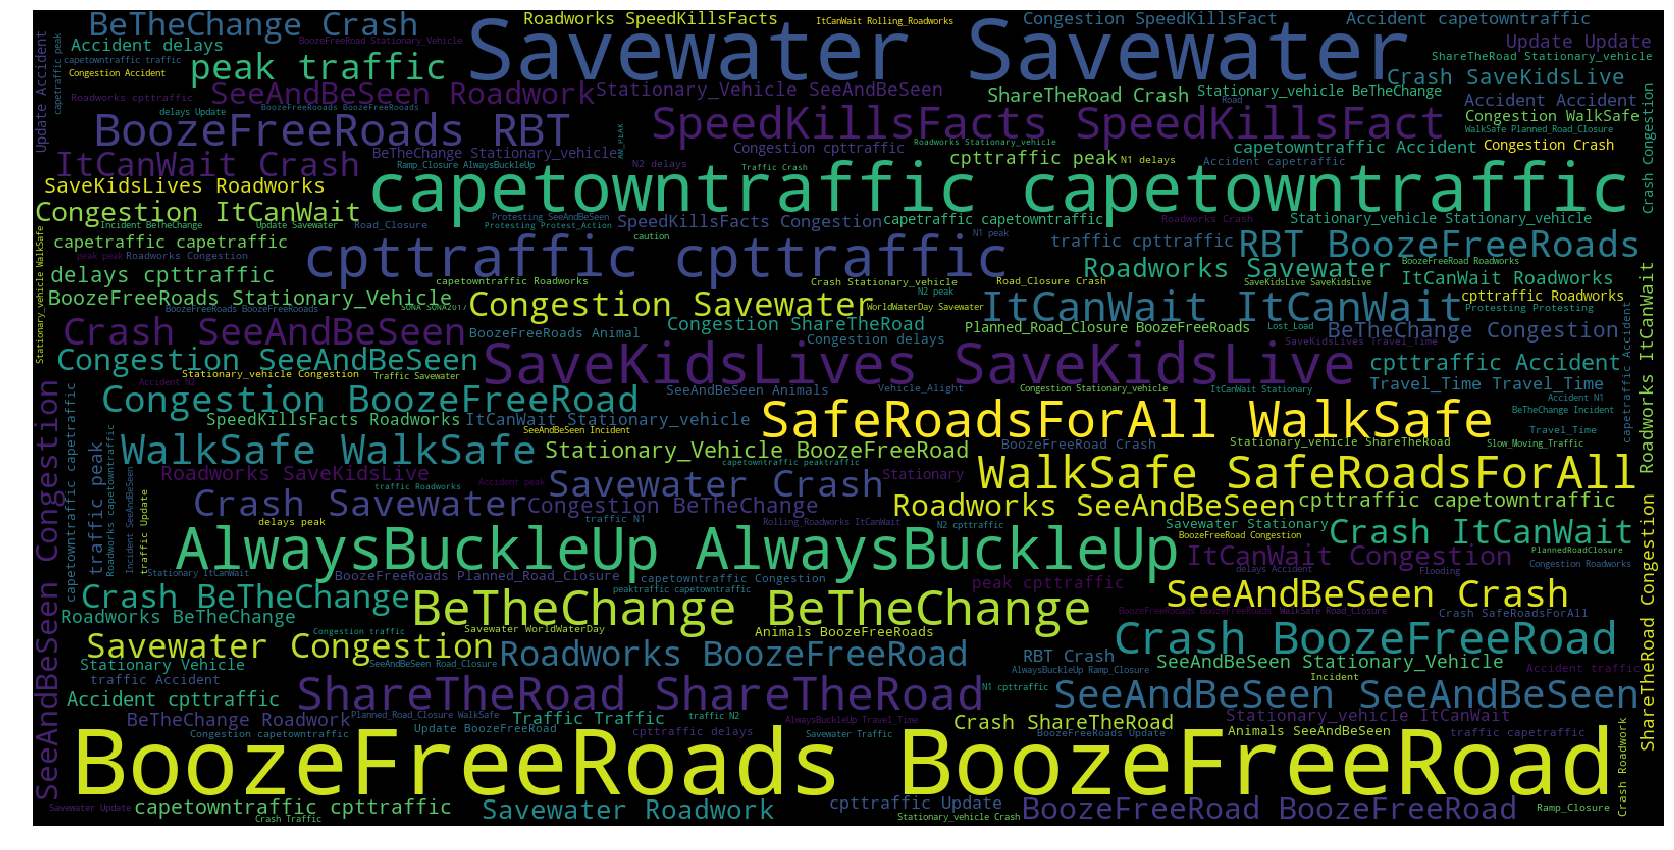

In [23]:
wordcloud = WordCloud(width = 1600, height = 800).generate(' '.join(df['hashtags']))

# Generate plot
plt.figure(figsize=(30,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file('wcloud_hashtags.png')

## Analysis Of Tweets

In [24]:
X = df['tweet']

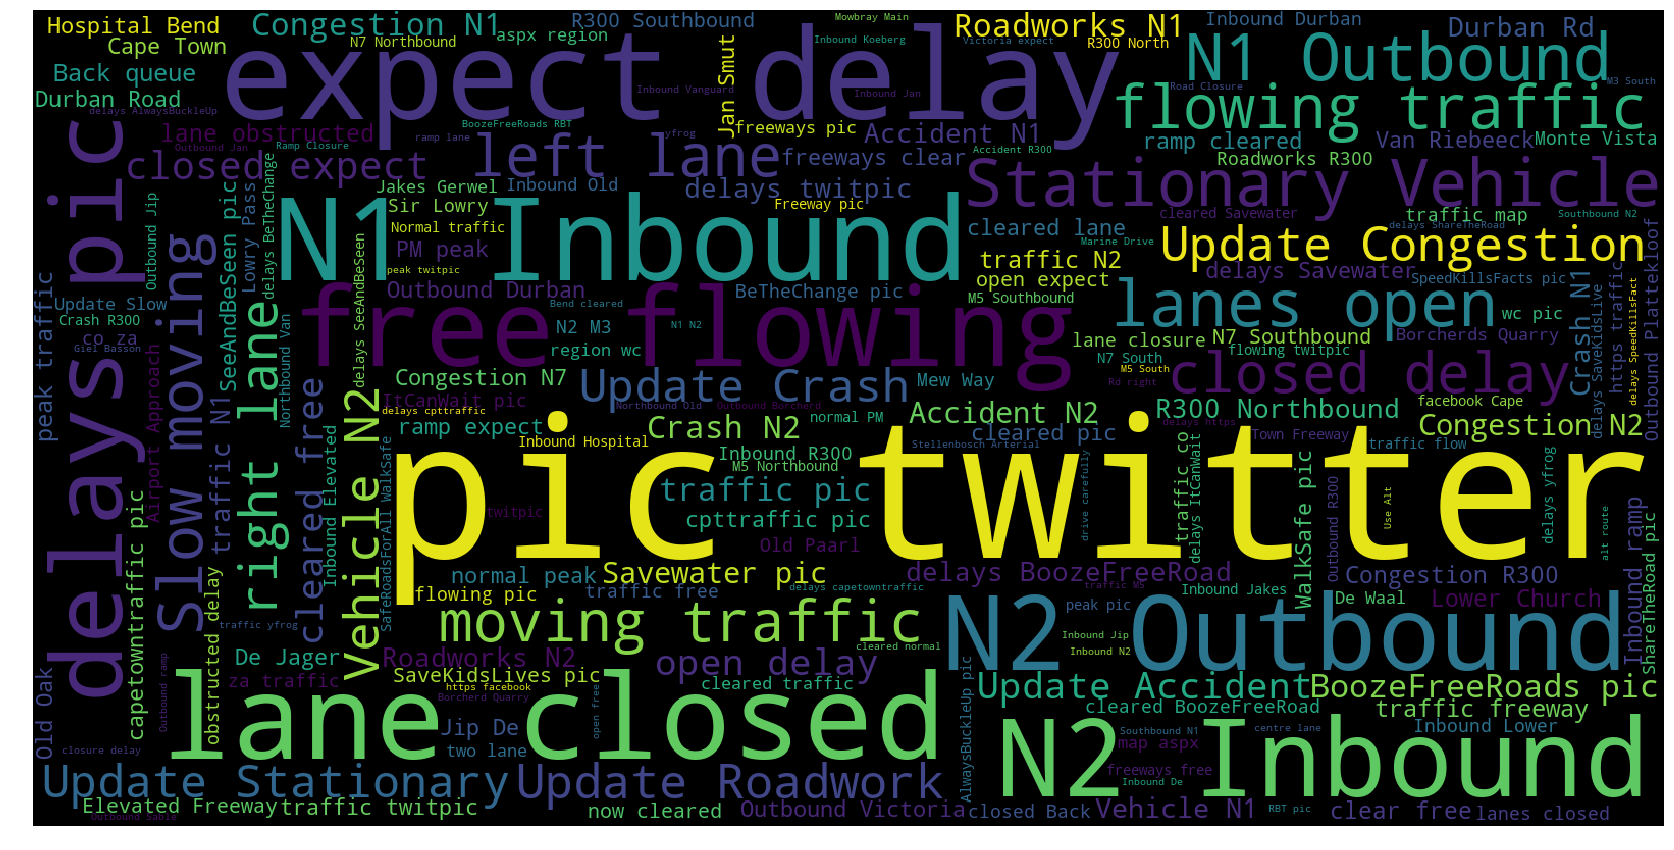

In [25]:
wordcloud = WordCloud(width = 1600, height = 800).generate(' '.join(X))

# Generate plot
plt.figure(figsize=(30,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file('wcloud_tweets.png')

In [26]:
list(X[:20])

['Slow moving Traffic: N1 Outbound towards Koeberg I/C, Pm Peak.#BoozeFreeRoads pic.twitter.com/mBwtw9psaz',
 'Slow moving Traffic: N2 Outbound towards Hospital Bend, Pm Peak.#BoozeFreeRoads pic.twitter.com/khnZNsiT5n',
 'Update :Stationary on N2  Outbound Ramp to Airport Approach Rd .is now cleared. #BoozeFreeRoads pic.twitter.com/hWBHnrMZZ1',
 '134419:Stationary on N2  Outbound Ramp to Airport Approach Rd .Left Lane Closed. No  Delays. #BoozeFreeRoads pic.twitter.com/LKqbPJOzv6',
 'Lost Load: N2 Outbound @ Bhunga, all lanes open, expect delays.#BoozeFreeRoads pic.twitter.com/U8zhicOO81',
 'Update,Roadworks: N1 Outbound before Durban Rd, All lanes open.#BoozeFreeRoads pic.twitter.com/xHJup9eGRk',
 '134412: Stationary Vehicle on Ramp to Sable Rd Outbound. Right lane closed. No Delays pic.twitter.com/tUjUre0Vas',
 'Update : Animals on N2 Outbound before Mew Way. has been cleared.#BoozeFreeRoads pic.twitter.com/eRlsUJrOUU',
 'Roadworks: N1 Outbound before Durban Rd, Right lane closed, ex

In [27]:
test = df['tweet'].str.extract(r'(pic.twitter.com)/(\w+)')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [28]:
test.head()

0           1
0  pic.twitter.com  mBwtw9psaz
1  pic.twitter.com  khnZNsiT5n
2  pic.twitter.com  hWBHnrMZZ1
3  pic.twitter.com  LKqbPJOzv6
4  pic.twitter.com  U8zhicOO81

In [29]:
test.shape

(179350, 2)

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179350 entries, 0 to 179349
Data columns (total 2 columns):
0    126701 non-null object
1    126701 non-null object
dtypes: object(2)
memory usage: 2.7+ MB


In [31]:
df['pic'] = test.iloc[:,1]

In [32]:
df.head(10)

date_time                                              tweet  \
0 2018-07-23 15:42:15  Slow moving Traffic: N1 Outbound towards Koebe...   
1 2018-07-23 15:40:58  Slow moving Traffic: N2 Outbound towards Hospi...   
2 2018-07-23 15:38:15  Update :Stationary on N2  Outbound Ramp to Air...   
3 2018-07-23 15:30:33  134419:Stationary on N2  Outbound Ramp to Airp...   
4 2018-07-23 15:03:59  Lost Load: N2 Outbound @ Bhunga, all lanes ope...   
5 2018-07-23 15:03:00  Update,Roadworks: N1 Outbound before Durban Rd...   
6 2018-07-23 14:47:02  134412: Stationary Vehicle on Ramp to Sable Rd...   
7 2018-07-23 14:31:30  Update : Animals on N2 Outbound before Mew Way...   
8 2018-07-23 13:45:22  Roadworks: N1 Outbound before Durban Rd, Right...   
9 2018-07-23 13:42:55  134401: Animals on N2 Outbound before Mew Way....   

   replies  retweets  likes         hashtags  \
0        0         1      1  #BoozeFreeRoads   
1        0         0      0  #BoozeFreeRoads   
2        0         0      0  #BoozeFreeRoads   
3        0         0      0  #BoozeFreeRoads   
4        0         0      0  #BoozeFreeRoads   
5        0         0      0  #BoozeFreeRoads   
6        0         0      0                    
7        0         0      0  #BoozeFreeRoads   
8        0         1      0  #BoozeFreeRoads   
9        0         0      0  #BoozeFreeRoads   

                                                link user_rt mentions  \
0  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   
1  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   
2  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   
3  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   
4  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   
5  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   
6  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   
7  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   
8  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   
9  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   

          pic  
0  mBwtw9psaz  
1  khnZNsiT5n  
2  hWBHnrMZZ1  
3  LKqbPJOzv6  
4  U8zhicOO81  
5  xHJup9eGRk  
6  tUjUre0Vas  
7  eRlsUJrOUU  
8  kVcu1rDBxy  
9  8u9jtWB38V

In [33]:
X = X.str.replace(r'pic.twitter.com/\w+', 'pic')

In [34]:
list(X[:20])

['Slow moving Traffic: N1 Outbound towards Koeberg I/C, Pm Peak.#BoozeFreeRoads pic',
 'Slow moving Traffic: N2 Outbound towards Hospital Bend, Pm Peak.#BoozeFreeRoads pic',
 'Update :Stationary on N2  Outbound Ramp to Airport Approach Rd .is now cleared. #BoozeFreeRoads pic',
 '134419:Stationary on N2  Outbound Ramp to Airport Approach Rd .Left Lane Closed. No  Delays. #BoozeFreeRoads pic',
 'Lost Load: N2 Outbound @ Bhunga, all lanes open, expect delays.#BoozeFreeRoads pic',
 'Update,Roadworks: N1 Outbound before Durban Rd, All lanes open.#BoozeFreeRoads pic',
 '134412: Stationary Vehicle on Ramp to Sable Rd Outbound. Right lane closed. No Delays pic',
 'Update : Animals on N2 Outbound before Mew Way. has been cleared.#BoozeFreeRoads pic',
 'Roadworks: N1 Outbound before Durban Rd, Right lane closed, expect delays.#BoozeFreeRoads pic',
 '134401: Animals on N2 Outbound before Mew Way.All Lanes Open. No Delays. Drive  Carefully.#BoozeFreeRoads pic',
 'Update: 128721: Roadworks; R300 No

In [35]:
del test

### Remove and replace urls

In [36]:
regex = r'(http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+)'

In [37]:
df['urls'] = df['tweet'].str.extract(regex)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [38]:
df.head(10)

date_time                                              tweet  \
0 2018-07-23 15:42:15  Slow moving Traffic: N1 Outbound towards Koebe...   
1 2018-07-23 15:40:58  Slow moving Traffic: N2 Outbound towards Hospi...   
2 2018-07-23 15:38:15  Update :Stationary on N2  Outbound Ramp to Air...   
3 2018-07-23 15:30:33  134419:Stationary on N2  Outbound Ramp to Airp...   
4 2018-07-23 15:03:59  Lost Load: N2 Outbound @ Bhunga, all lanes ope...   
5 2018-07-23 15:03:00  Update,Roadworks: N1 Outbound before Durban Rd...   
6 2018-07-23 14:47:02  134412: Stationary Vehicle on Ramp to Sable Rd...   
7 2018-07-23 14:31:30  Update : Animals on N2 Outbound before Mew Way...   
8 2018-07-23 13:45:22  Roadworks: N1 Outbound before Durban Rd, Right...   
9 2018-07-23 13:42:55  134401: Animals on N2 Outbound before Mew Way....   

   replies  retweets  likes         hashtags  \
0        0         1      1  #BoozeFreeRoads   
1        0         0      0  #BoozeFreeRoads   
2        0         0      0  #BoozeFreeRoads   
3        0         0      0  #BoozeFreeRoads   
4        0         0      0  #BoozeFreeRoads   
5        0         0      0  #BoozeFreeRoads   
6        0         0      0                    
7        0         0      0  #BoozeFreeRoads   
8        0         1      0  #BoozeFreeRoads   
9        0         0      0  #BoozeFreeRoads   

                                                link user_rt mentions  \
0  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   
1  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   
2  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   
3  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   
4  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   
5  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   
6  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   
7  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   
8  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   
9  https://twitter.com/CapeTownFreeway/status/102...    None      NaN   

          pic urls  
0  mBwtw9psaz  NaN  
1  khnZNsiT5n  NaN  
2  hWBHnrMZZ1  NaN  
3  LKqbPJOzv6  NaN  
4  U8zhicOO81  NaN  
5  xHJup9eGRk  NaN  
6  tUjUre0Vas  NaN  
7  eRlsUJrOUU  NaN  
8  kVcu1rDBxy  NaN  
9  8u9jtWB38V  NaN

In [39]:
X = X.str.replace(regex, 'url')

In [41]:
df['urls'].nunique()

38757

## Build The Model

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test = train_test_split(X, test_size = 0.2)

In [44]:
X_test.shape

(35870,)

In [45]:
list(X_train[:5])

['Flooding:N1 outbound before Wingfield, right lane affected, drive with caution, no delays pic',
 'Road Closure: N1 Inbound at Jip de Jager due to crash at Plattekloof, Use alternate route ... pic',
 'Slow moving traffic M5 North between N2 & Berkley due to roadworks  url\xa0',
 '#Crash: N1 Outbound after Koeberg I/C,  All lanes open, no delays. #BeTheChange pic',
 'Update:Stationary vehicle: N1 outbound after Marine Drive, is cleared #SafeRoadsForAll #WalkSafe pic']

In [46]:
list(X_test[:5])

['M5 freeway is free flowing in both directions  url\xa0',
 'Update: Congestion N2 Outbound at Victoria, is cleared. #AlwaysBuckleUp  url\xa0… pic',
 "#Accident, N2 inbound @ Borcherd's Quarry, all lanes open no delays #capetraffic  url\xa0",
 'Congestion: N1 inbound at Elevated Freeway, Cleared, Free flowing traffic  #cpttraffic pic',
 'N2 Inbound slow moving traffic from Raapenberg to Liesbeeck  url\xa0']

### Clustering Model With Dimensionality Reduction And Tokenisation Steps

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')

# dimensionality reduction
from sklearn.decomposition import TruncatedSVD

# streamlines our model training by allowing us to chain all the model-building steps
from sklearn.pipeline import make_pipeline



In [48]:
dim_reduction = TruncatedSVD(2)

In [49]:
from sklearn.cluster import KMeans

In [50]:
# start off with two clusters, will change later
cluster = KMeans(2)

In [51]:
# now we build our model

model = make_pipeline(cv, dim_reduction, cluster)

In [52]:
model.fit(X_train)

Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english...2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [53]:
np.unique(model.named_steps['kmeans'].labels_)

array([0, 1])

In [54]:
model.named_steps['truncatedsvd'].explained_variance_

array([0.23891369, 0.81203887])

In [55]:
model.named_steps['truncatedsvd'].explained_variance_ratio_

array([0.02886214, 0.09809892])

In [56]:
model.named_steps['truncatedsvd'].components_.shape

(2, 3354)

In [57]:
model.named_steps

{'countvectorizer': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1), preprocessor=None, stop_words='english',
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'kmeans': KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 'truncatedsvd': TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
        random_state=None, tol=0.0)}

In [58]:
# separate trained model into the different steps
vectorizer_1 = model.named_steps['countvectorizer']

kmeans_2 = model.named_steps['kmeans']

tsvd_3 = model.named_steps['truncatedsvd']

In [59]:
# get cluster indexes for train and test sets

train_p = model.predict(X_train).reshape(-1, 1)

test_p = model.predict(X_test).reshape(-1, 1)

# get reduced dimensions for train and test sets

train_set = tsvd_3.transform(vectorizer_1.transform(X_train))
test_set = tsvd_3.transform(vectorizer_1.transform(X_test))

# Concatenate the datasets
print(train_set.shape)
print()
print(train_p.shape)
train_set = np.concatenate((train_set, train_p), axis = 1)
test_set = np.concatenate((test_set, test_p), axis = 1)

# make the datasets into dataframes

train_df = pd.DataFrame(train_set, columns = ['dim_1', 'dim_2', 'cluster_indexes'])
test_df = pd.DataFrame(test_set, columns = ['dim_1', 'dim_2', 'cluster_indexes'])

(143480, 2)

(143480, 1)


## Cluster Plots

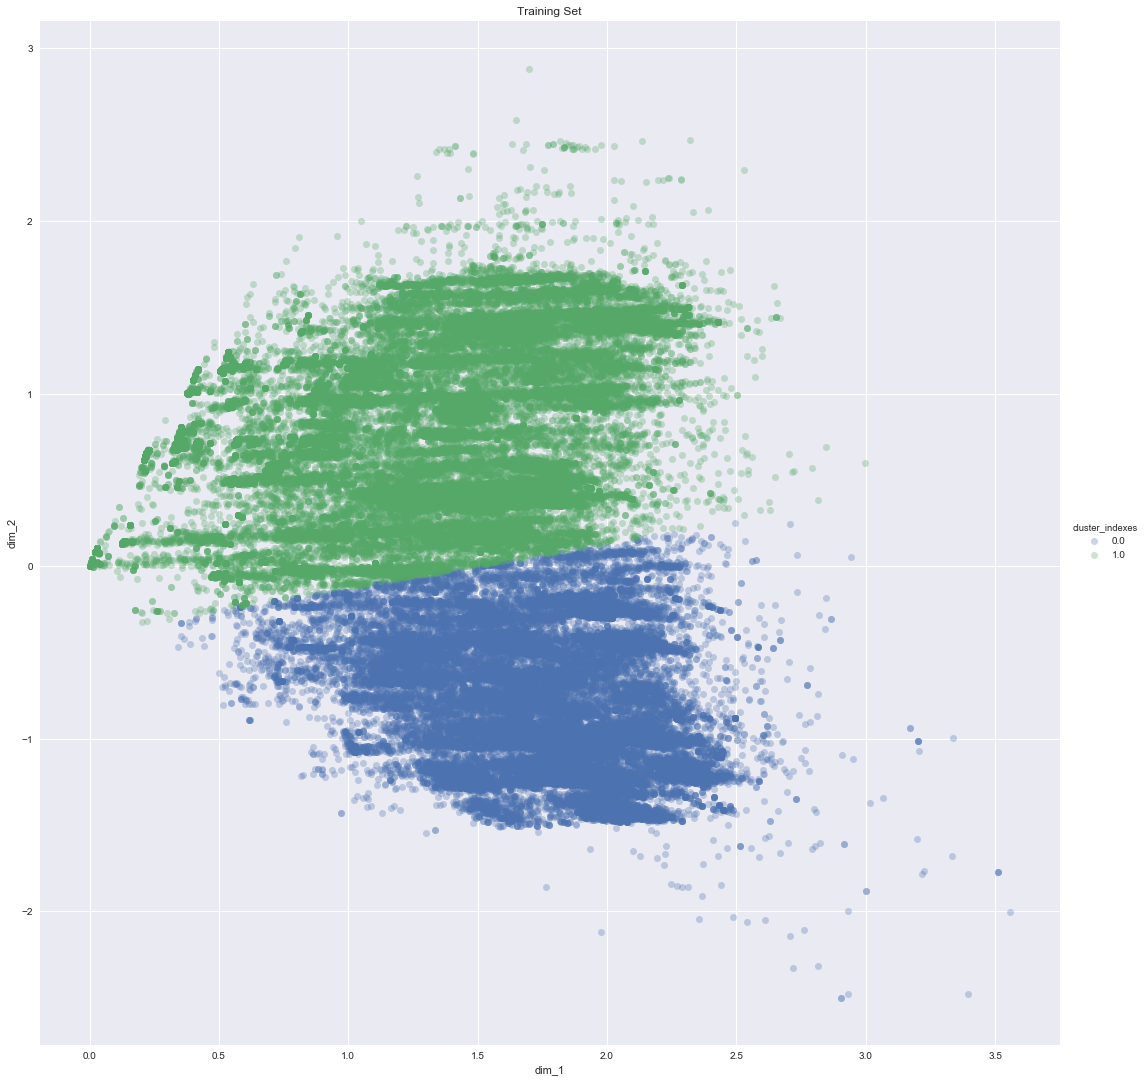

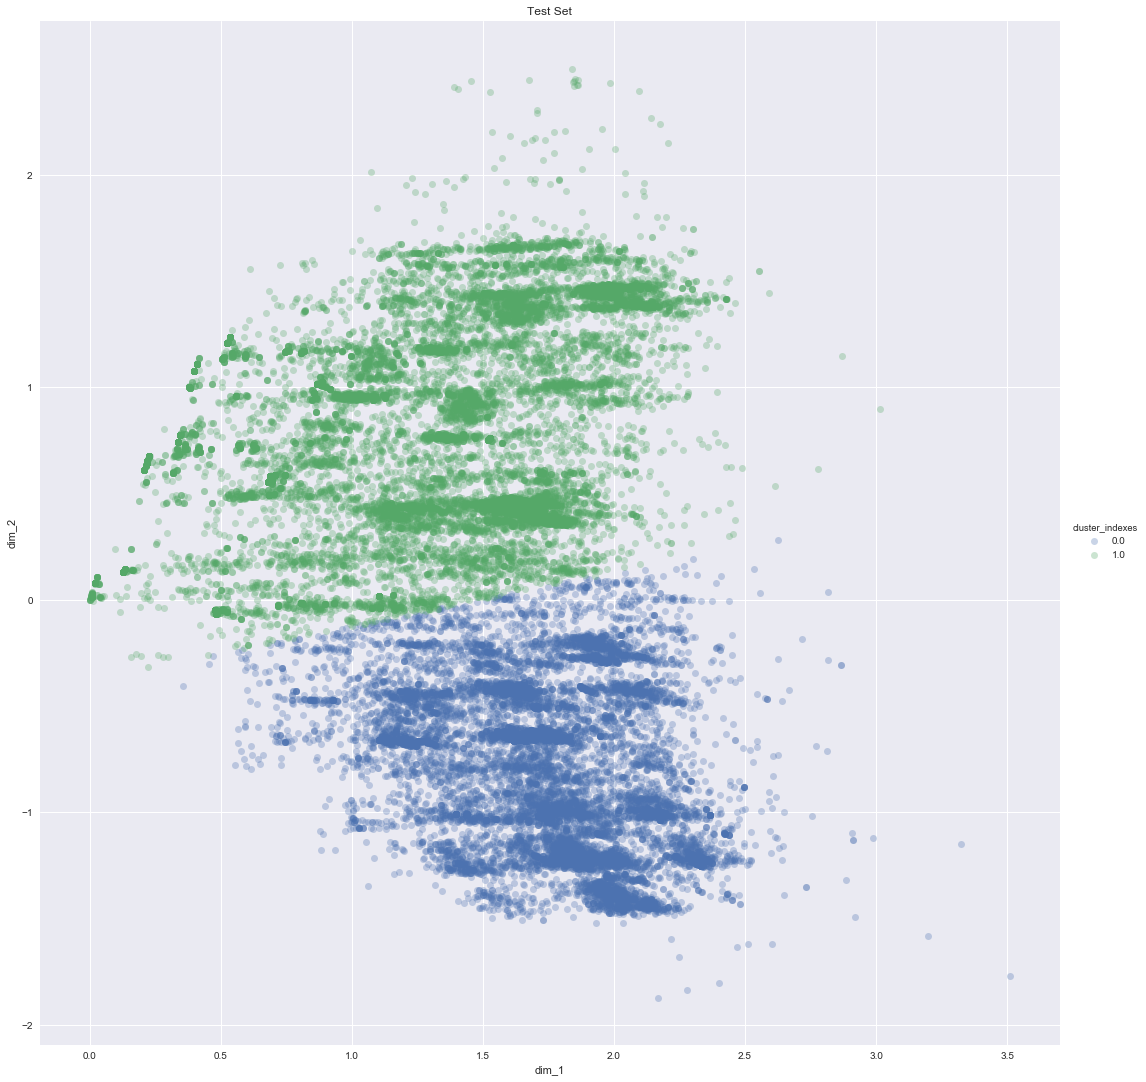

In [60]:
sns.set()
# fig, axes = plt.subplots(nrows = 2, figsize = (60, 32))

fig1 = sns.lmplot(x="dim_1", y="dim_2",
                     data=train_df,fit_reg = False, scatter = True, hue = 'cluster_indexes',scatter_kws={'alpha':0.3}, size = 15)

ax = plt.gca()
ax.set_title("Training Set")

fig2 = sns.lmplot(x="dim_1", y="dim_2",
                     data=test_df,fit_reg = False, scatter = True, hue = 'cluster_indexes',scatter_kws={'alpha':0.3}, size = 15)

ax = plt.gca()
ax.set_title("Test Set")

fig1.savefig('train_set.png')
fig2.savefig('test_set.png')

In [64]:
X_test.shape

(35870,)

In [63]:
test_df.shape

(35870, 3)

### Create new dataframes linking clusters to tweets

In [71]:
# create dataframe with
new_test_1 = np.concatenate([X_test.reshape(-1,1), test_df.as_matrix()], axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [72]:
new_test_1.shape

(35870, 4)

In [73]:
test_df.columns

Index(['dim_1', 'dim_2', 'cluster_indexes'], dtype='object')

In [75]:
new_test_1 = pd.DataFrame(new_test_1, columns = ['tweets','dim_1', 'dim_2', 'cluster_indexes'])

In [76]:
new_test_1.head()

tweets     dim_1     dim_2  \
0  M5 freeway is free flowing in both directions ...  0.370802  0.710669   
1  Update: Congestion N2 Outbound at Victoria, is...   1.73033  0.595834   
2  #Accident, N2 inbound @ Borcherd's Quarry, all...   1.29544 -0.201987   
3  Congestion: N1 inbound at Elevated Freeway, Cl...   1.66687   1.26668   
4  N2 Inbound slow moving traffic from Raapenberg...   1.03149   0.94896   

  cluster_indexes  
0               1  
1               1  
2               0  
3               1  
4               1

In [77]:
new_test_2 = new_test_1[new_test_1['cluster_indexes'] == 0]

In [78]:
new_test_1 = new_test_1[new_test_1['cluster_indexes'] == 1]

In [79]:
new_test_1.shape

(19732, 4)

In [80]:
new_test_2.shape

(16138, 4)

In [81]:
new_test_1.head()

tweets     dim_1     dim_2  \
0  M5 freeway is free flowing in both directions ...  0.370802  0.710669   
1  Update: Congestion N2 Outbound at Victoria, is...   1.73033  0.595834   
3  Congestion: N1 inbound at Elevated Freeway, Cl...   1.66687   1.26668   
4  N2 Inbound slow moving traffic from Raapenberg...   1.03149   0.94896   
5                      N2 Free flowing traffic.  url   0.80543   1.16375   

  cluster_indexes  
0               1  
1               1  
3               1  
4               1  
5               1

In [82]:
new_test_2.head()

tweets    dim_1     dim_2  \
2  #Accident, N2 inbound @ Borcherd's Quarry, all...  1.29544 -0.201987   
6  Update #Roadworks N1 Inbound at Old Oak, Right...  2.13523 -0.999164   
7  #Roadworks: N1 Outbound @ Durban Road, right l...  1.98202  -1.42436   
8  Stationary Vehicle N2 at Hospital Bend, left l...  1.91185  -1.45206   
9  Accident, N1 inbound, at Cecilia, all lanes op...  1.20825 -0.214086   

  cluster_indexes  
2               0  
6               0  
7               0  
8               0  
9               0

### Wordcloud for cluster 1

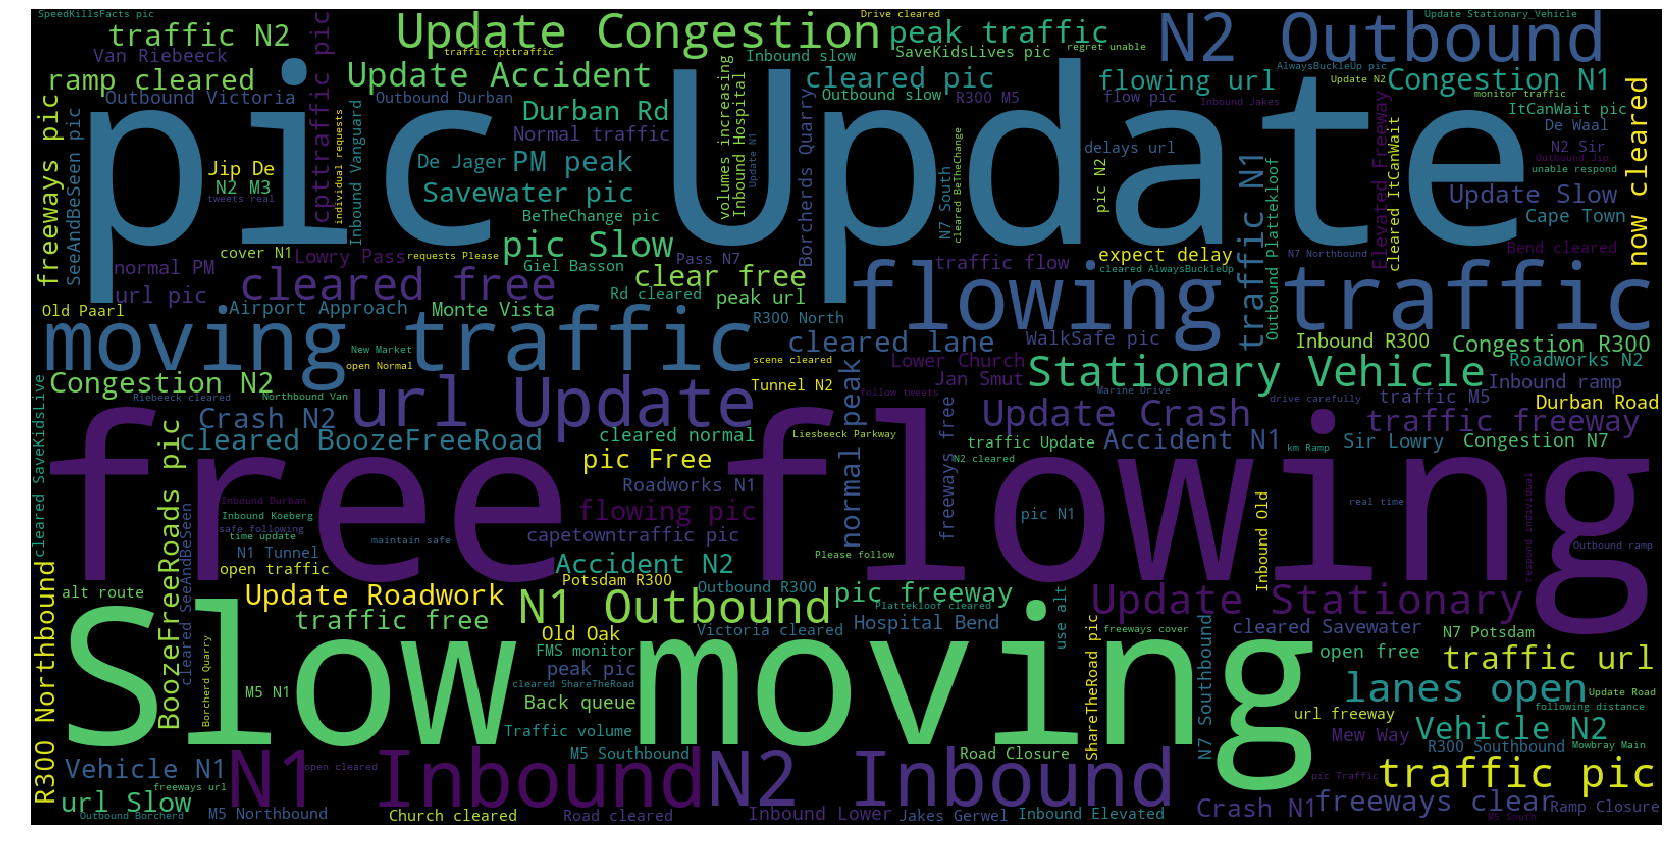

In [117]:
wordcloud = WordCloud(width = 1600, height = 800).generate(' '.join(new_test_1['tweets']))

# Generate plot
plt.figure(figsize=(30,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file('wcloud_tw_test_1.png')

### Wordcloud for cluster 2

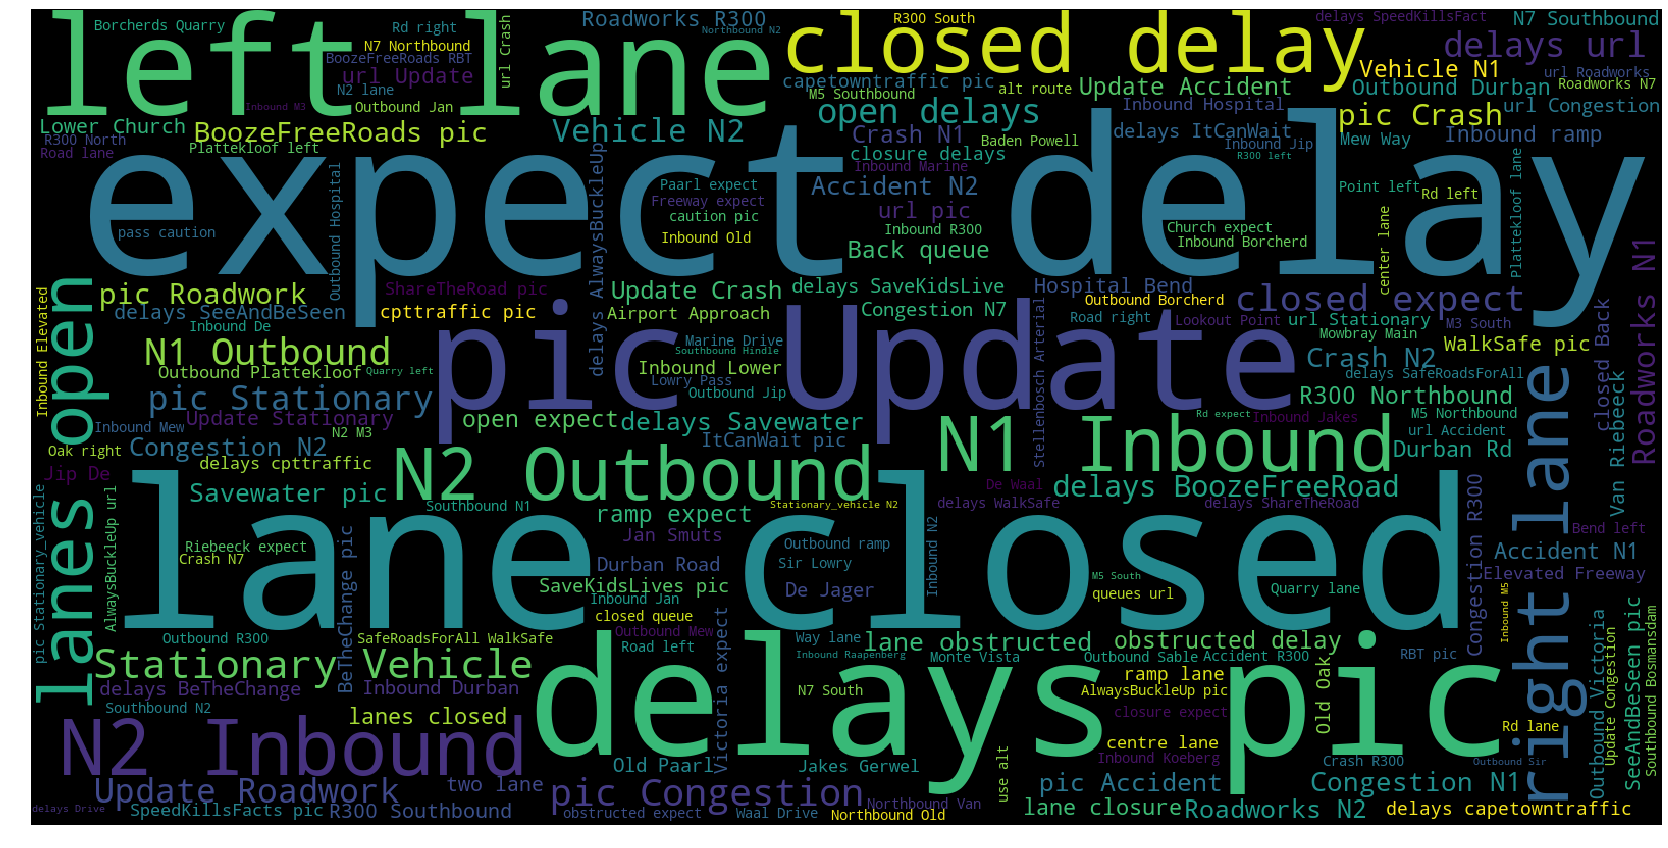

In [116]:
wordcloud = WordCloud(width = 1600, height = 800).generate(' '.join(new_test_2['tweets']))

# Generate plot
plt.figure(figsize=(30,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file('wcloud_tw_test_2.png')

## Using the TextBlob Library We Do Sentiment Analysis Of The Clusters

In [85]:
# let's get textblob

from textblob import TextBlob

In [87]:
test = TextBlob("I am the saddest man alive, please help me! #SickAf")

In [88]:
test.sentiment

Sentiment(polarity=0.125, subjectivity=0.4)

In [90]:
test.sentiment[1]

0.4

In [91]:
new_test_1['polarity'] = new_test_1['tweets'].apply(lambda x: TextBlob(x).sentiment[0])

new_test_2['polarity'] = new_test_2['tweets'].apply(lambda x: TextBlob(x).sentiment[0])

In [92]:
new_test_1['subjectivity'] = new_test_1['tweets'].apply(lambda x: TextBlob(x).sentiment[1])

new_test_2['subjectivity'] = new_test_2['tweets'].apply(lambda x: TextBlob(x).sentiment[1])

### What is the distribution of polarity and subjectivity in the two clusters?

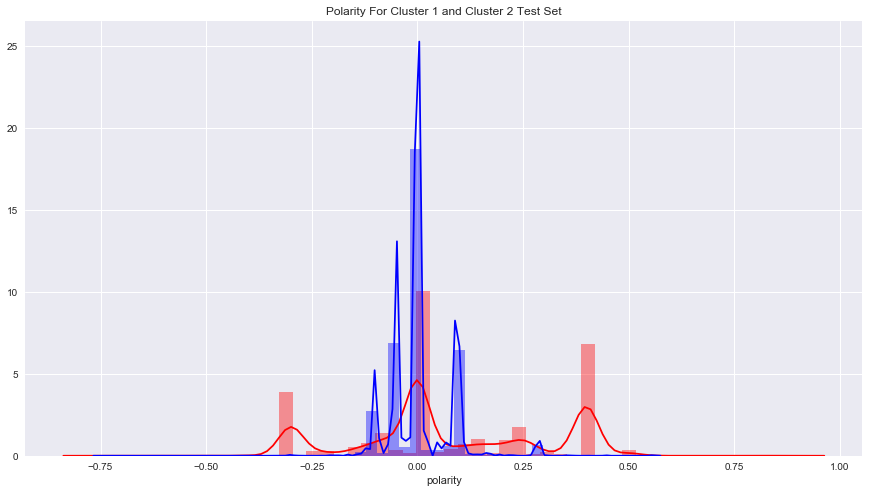

In [112]:
sns.set()
fig, axes = plt.subplots(figsize = (15, 8))

axes.set_title('Polarity For Cluster 1 and Cluster 2 Test Set')

sns.distplot(new_test_1['polarity'], color = 'r', ax = axes, kde = True, norm_hist = True)
sns.distplot(new_test_2['polarity'], color = 'b', ax = axes, kde = True, norm_hist = True)

fig.savefig('polarity_dist_test.png')

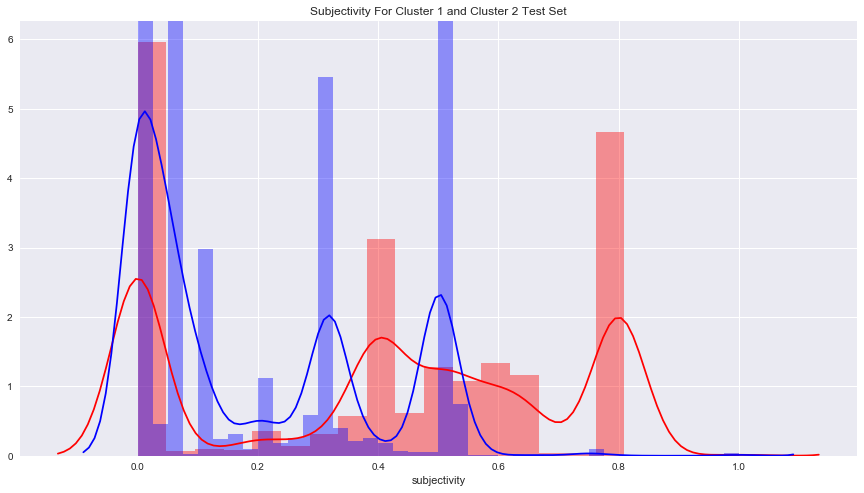

In [113]:
sns.set()
fig, axes = plt.subplots(figsize = (15, 8))

axes.set_title('Subjectivity For Cluster 1 and Cluster 2 Test Set')

sns.distplot(new_test_1['subjectivity'], color = 'r', ax = axes, norm_hist = True)
sns.distplot(new_test_2['subjectivity'], color = 'b', ax = axes, norm_hist = True)

fig.savefig('subjectivity_dist_test.png')

In [107]:
new_test_1.describe()

polarity  subjectivity
count  19732.000000  19732.000000
mean       0.077895      0.407398
std        0.232788      0.302248
min       -0.750000      0.000000
25%       -0.016667      0.000000
50%        0.000000      0.409848
75%        0.253030      0.650000
max        0.875000      1.000000

In [108]:
new_test_2.describe()

polarity  subjectivity
count  16138.000000  16138.000000
mean       0.005964      0.183810
std        0.070788      0.197663
min       -0.750000      0.000000
25%       -0.050000      0.000000
50%        0.000000      0.100000
75%        0.000000      0.317857
max        0.558036      1.000000

## t-tests for polarity and subjectivity between clusters

In [109]:
from scipy.stats import ttest_ind

In [110]:
ttest_ind(new_test_1['polarity'], new_test_2['polarity'])

Ttest_indResult(statistic=37.84841074165724, pvalue=2.085761730850489e-307)

In [111]:
ttest_ind(new_test_1['subjectivity'], new_test_2['subjectivity'])

Ttest_indResult(statistic=80.88667957700756, pvalue=0.0)

In [114]:
# PAM aka kmedoid and DBSCAN clustering techniques